<a href="https://colab.research.google.com/github/ujjalkumarmaity/Loan_Predction/blob/master/project_my3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# PREPROSSING

In [0]:
data = pd.read_csv('/content/drive/My Drive/project/train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
#test=pd.read_csv('test.csv')

In [0]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
len(data)

614

In [0]:
data.dropna(inplace=True)
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [0]:
len(data)

480

In [0]:
from sklearn import preprocessing
lavel_encoder=preprocessing.LabelEncoder()
col=data.columns
for i in col:
    if data[i].dtype==object:
        data[i]=lavel_encoder.fit_transform(data[i])
data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

train test split

In [0]:
from sklearn.model_selection import train_test_split
x=data.drop(columns='Loan_Status',axis=1,inplace=False)
y=data['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33)

In [0]:
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
115,87,1,1,1,0,0,14583,0.0,185.0,180.0,1.0,0
241,186,1,1,1,1,0,2510,1983.0,140.0,180.0,1.0,2
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
287,227,1,1,0,0,0,3704,2000.0,120.0,360.0,1.0,0
137,102,1,1,2,0,1,3316,3500.0,88.0,360.0,1.0,2


# AUC Score

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
def auc_csore(probs,test):
    probs = probs[:, 1]
    auc = roc_auc_score(test, probs)
    print(' AUC: %.3f' % auc)
    fpr, tpr, thresholds = roc_curve(test, probs)
    #print(fpr,tpr,thresholds)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')

# F1_Score

In [0]:
from sklearn.metrics import f1_score
def f1(pred,test):
    score=f1_score(pred,test)
    print('f1 score',score)

# Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy testing 0.8176100628930818
f1 score 0.882591093117409
 AUC: 0.780
accuracy train 0.8037383177570093
f1 score 0.8695652173913043
 AUC: 0.753


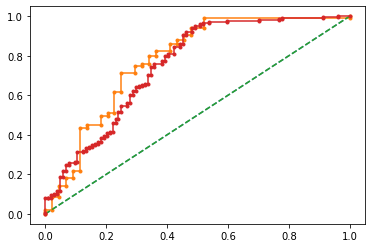

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('accuracy testing',accuracy_score(y_test,pred))
f1(pred,y_test)
pred=model.predict_proba(x_test)
auc_csore(pred,y_test)

pred=model.predict(x_train)
print('accuracy train',accuracy_score(y_train,pred))
f1(pred,y_train)
pred=model.predict_proba(x_train)
auc_csore(pred,y_train)

# KNN

accuracy test 0.6289308176100629
f1 score 0.7611336032388666
 AUC: 0.411
accuracy train 0.7632398753894081
f1 score 0.8396624472573839
 AUC: 0.795


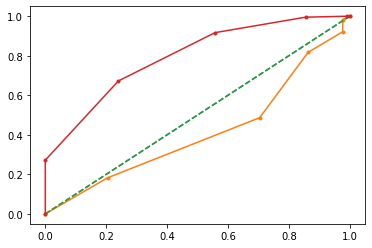

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
predict_k=model.predict(x_test)

print('accuracy test',accuracy_score(y_test,predict_k))
f1(predict_k,y_test)
pred=model.predict_proba(x_test)
auc_csore(pred,y_test)

pred=model.predict(x_train)
print('accuracy train',accuracy_score(y_train,pred))
f1(pred,y_train)
pred=model.predict_proba(x_train)
auc_csore(pred,y_train)
plt.show()

# CART 

accuracy in test 0.6540880503144654
f1 score 0.7488584474885845
 AUC: 0.607
accuracy in train 1.0
f1 score 1.0
 AUC: 1.000


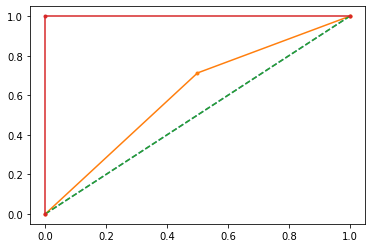

In [0]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
predict_k=model.predict(x_test)

print('accuracy in test',accuracy_score(y_test,predict_k))
f1(predict_k,y_test)
pred=model.predict_proba(x_test)
auc_csore(pred,y_test)

predict_k=model.predict(x_train)
print('accuracy in train',accuracy_score(y_train,predict_k))
f1(predict_k,y_train)
pred=model.predict_proba(x_train)
auc_csore(pred,y_train)
plt.show()

# Naive Bayes

accuracy of test 0.7861635220125787
f1 score 0.857142857142857
 AUC: 0.784
accuracy of train 0.7819314641744548
f1 score 0.849785407725322
 AUC: 0.752


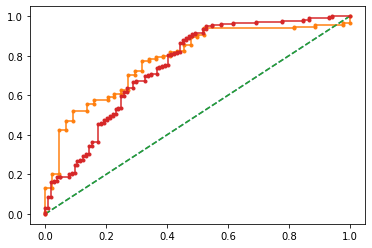

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model=GaussianNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print('accuracy of test',accuracy_score(pred,y_test))
f1(pred,y_test)
pred=model.predict_proba(x_test)
auc_csore(pred,y_test)

pred_t=model.predict(x_train)
print('accuracy of train',accuracy_score(pred_t,y_train))
f1(pred_t,y_train)
pred=model.predict_proba(x_train)
auc_csore(pred,y_train)
plt.show()

In [0]:
pred=pred.tolist()
pred.count(0)

0

# Random Forest

accuracy of test  0.8427672955974843
f1 score 0.8979591836734695
 AUC: 0.794
accuracy of train 1.0
f1 score 1.0
 AUC: 1.000


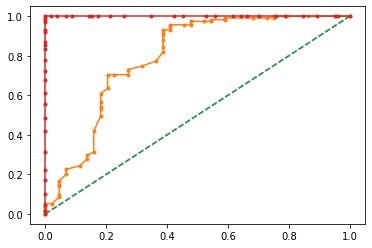

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
pred_test=model.predict(x_test)

print('accuracy of test ',accuracy_score(pred_test,y_test))
f1(pred_test,y_test)
pred=model.predict_proba(x_test)
auc_csore(pred,y_test)

pred_train=model.predict(x_train)
print('accuracy of train',accuracy_score(pred_train,y_train))
f1(pred_train,y_train)
pred=model.predict_proba(x_train)

auc_csore(pred,y_train)

plt.show()

# Support Vector Machine 

accuracy of test  0.6981132075471698
f1 score 0.8222222222222223
 AUC: 0.532
accuracy of train 0.6947040498442367
f1 score 0.8157894736842105
 AUC: 0.603


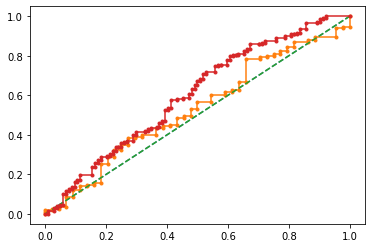

In [0]:
from sklearn import svm
from sklearn.metrics import accuracy_score
model=svm.SVC(gamma='scale',probability=True)
model.fit(x_train,y_train)
pred_test=model.predict(x_test)

print('accuracy of test ',accuracy_score(pred_test,y_test))
f1(pred_test,y_test)
pred=model.predict_proba(x_test)
auc_csore(pred,y_test)

pred_train=model.predict(x_train)
print('accuracy of train',accuracy_score(pred_train,y_train))
f1(pred_train,y_train)
pred=model.predict_proba(x_train)

auc_csore(pred,y_train)

plt.show()

# Adaboost 

accuracy of test  0.7987421383647799
f1 score 0.8655462184873949
 AUC: 0.692
accuracy of train 0.897196261682243
f1 score 0.9271523178807948
 AUC: 0.967


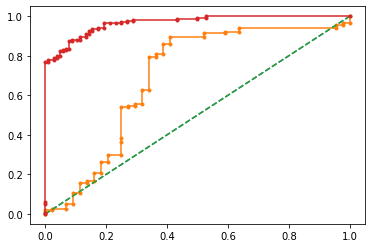

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
model=AdaBoostClassifier(n_estimators=100,random_state=0)
model.fit(x_train,y_train)
pred_test=model.predict(x_test)

print('accuracy of test ',accuracy_score(pred_test,y_test))
f1(pred_test,y_test)
pred=model.predict_proba(x_test)
auc_csore(pred,y_test)

pred_train=model.predict(x_train)
print('accuracy of train',accuracy_score(pred_train,y_train))
f1(pred_train,y_train)
pred=model.predict_proba(x_train)

auc_csore(pred,y_train)

plt.show()

#  Neural Network (Nnet)

accuracy of test  0.7169811320754716
f1 score 0.8351648351648353
 AUC: 0.499
accuracy of train 0.6822429906542056
f1 score 0.8097014925373135
 AUC: 0.470


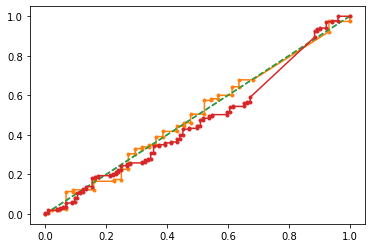

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 8), random_state=1)
model.fit(x_train,y_train)
pred_test=model.predict(x_test)

print('accuracy of test ',accuracy_score(pred_test,y_test))
f1(pred_test,y_test)
pred=model.predict_proba(x_test)
auc_csore(pred,y_test)

pred_train=model.predict(x_train)
print('accuracy of train',accuracy_score(pred_train,y_train))
f1(pred_train,y_train)
pred=model.predict_proba(x_train)

auc_csore(pred,y_train)

plt.show()

# Linear model